In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive
import regex as re
%matplotlib inline
import matplotlib
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [8]:
df.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


#Data Cleaning

In [9]:
df = df.drop(columns = 'society')

In [10]:
df[df['location'].isna()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,1600,3.0,2.0,86.0


In [11]:
df[df['size'].isna()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,5000,NaN,NaN,400.000


In [12]:
df[df['balcony'].isna()].head(7)

,area_type,availability,location,size,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,NaN,204.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.0
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,1925,3.0,NaN,125.0
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,1296,2.0,NaN,81.0
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,NaN,200.0
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.0


In [13]:
df = df.dropna(subset = ['location', 'size', 'bath', 'balcony']).reset_index(drop = True)

In [14]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [15]:
df.shape

(12710, 8)

In [16]:
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8481
Built-up Area,2310
Plot Area,1837
Carpet Area,82


In [17]:
df['area_type'] = df['area_type'].map({'Super built-up  Area': 1, 'Built-up  Area': 2, 'Plot  Area': 3, 'Carpet  Area': 4})

In [18]:
df['availability'] = df['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)

In [19]:
df.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,3,1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,2,1,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [20]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [21]:
df['size'].value_counts()

,count
size,
2 BHK,5152
3 BHK,4128
4 Bedroom,749
1 BHK,530
3 Bedroom,527
4 BHK,489
2 Bedroom,328
5 Bedroom,263
6 Bedroom,169


In [22]:
df['BHK/RK'] = df['size'].apply(lambda x: 'BHK' if x.split(' ')[1] == 'BHK' or x.split(' ')[1] == 'Bedroom' else 'RK')

In [23]:
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [24]:
df['bath'] = df['bath'].astype('int')
df['balcony'] = df['balcony'].astype('int')

In [25]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK/RK
0,1,0,Electronic City Phase II,2,1056,2,1,39.07,BHK
1,3,1,Chikka Tirupathi,4,2600,5,3,120.00,BHK
2,2,1,Uttarahalli,3,1440,2,3,62.00,BHK
3,1,1,Lingadheeranahalli,3,1521,3,1,95.00,BHK
4,1,1,Kothanur,2,1200,2,1,51.00,BHK


In [26]:
df['BHK'] = pd.get_dummies(df['BHK/RK']).astype('int').drop(columns = 'RK')
df.drop(columns = 'BHK/RK', inplace = True)

In [27]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,1,0,Electronic City Phase II,2,1056,2,1,39.07,1
1,3,1,Chikka Tirupathi,4,2600,5,3,120.00,1
2,2,1,Uttarahalli,3,1440,2,3,62.00,1
3,1,1,Lingadheeranahalli,3,1521,3,1,95.00,1
4,1,1,Kothanur,2,1200,2,1,51.00,1


In [28]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
for i,row in df.iterrows() :
  if '-' in str(row['total_sqft']) :
    l = row['total_sqft'].split(' - ')
    if len(l) == 2 :
      df.loc[i, 'total_sqft'] = (float(l[0]) + float(l[1]))/2
    else :
      df.loc[i, 'total_sqft'] = float(l[0])

In [30]:
def non_nums(value):
    try:
        float(value)
    except ValueError:
        x.append(value)
x = []
df.total_sqft.apply(non_nums)
global x
len(x)

42

In [31]:
x

['34.46Sq. Meter',
 '1000Sq. Meter',
 '5.31Acres',
 '30Acres',
 '716Sq. Meter',
 '1500Sq. Meter',
 '142.61Sq. Meter',
 '1574Sq. Yards',
 '117Sq. Yards',
 '3040Sq. Meter',
 '500Sq. Yards',
 '167Sq. Meter',
 '3Cents',
 '188.89Sq. Yards',
 '204Sq. Meter',
 '45Sq. Yards',
 '133.3Sq. Yards',
 '78.03Sq. Meter',
 '122Sq. Yards',
 '84.53Sq. Meter',
 '2.09Acres',
 '24Guntha',
 '697Sq. Meter',
 '142.61Sq. Meter',
 '1500Cents',
 '132Sq. Yards',
 '2Acres',
 '1100Sq. Meter',
 '15Acres',
 '1.26Acres',
 '151.11Sq. Yards',
 '1Grounds',
 '2940Sq. Yards',
 '45.06Sq. Meter',
 '1.25Acres',
 '86.72Sq. Meter',
 '38Guntha',
 '6Acres',
 '120Sq. Yards',
 '24Sq. Meter',
 '142.84Sq. Meter',
 '300Sq. Yards']

In [32]:
# swft = sq_meter * 10.7639
# sqft = sq_yard * 9

In [33]:
for i,row in df.iterrows() :
  match = re.search('(\d+\.\d+|\d+)Sq\.\s(\w+)', str(row['total_sqft']))
  if match is not None :
    if match.group(2) == 'Yards':
      df.loc[i, 'total_sqft'] = float(match.group(1)) * 9
    elif match.group(2) == 'Meter':
      df.loc[i, 'total_sqft'] = float(match.group(1)) * 10.7639

In [34]:
x = []
df.total_sqft.apply(non_nums)
x

['5.31Acres',
 '30Acres',
 '3Cents',
 '2.09Acres',
 '24Guntha',
 '1500Cents',
 '2Acres',
 '15Acres',
 '1.26Acres',
 '1Grounds',
 '1.25Acres',
 '38Guntha',
 '6Acres']

In [35]:
lis = x[:]
df['total_sqft'] = df['total_sqft'].apply(lambda x: None if x in lis else x)

In [36]:
df.isna().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,13
bath,0
balcony,0
price,0
BHK,0


In [37]:
df = df.dropna(subset = ['total_sqft'])
df['total_sqft'] = df['total_sqft'].astype('float')

<ipython-input-37-a962b57ebf2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].astype('float')


In [38]:
df = df.rename(columns = {'availability' : 'immediate_availability'})

In [39]:
df.head()

,area_type,immediate_availability,location,size,total_sqft,bath,balcony,price,BHK
0,1,0,Electronic City Phase II,2,1056.0,2,1,39.07,1
1,3,1,Chikka Tirupathi,4,2600.0,5,3,120.00,1
2,2,1,Uttarahalli,3,1440.0,2,3,62.00,1
3,1,1,Lingadheeranahalli,3,1521.0,3,1,95.00,1
4,1,1,Kothanur,2,1200.0,2,1,51.00,1


In [40]:
df['price_per_Sq.ft'] = df['price'] * 100000 / df['total_sqft']

In [41]:
df.head(2)

,area_type,immediate_availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_Sq.ft
0,1,0,Electronic City Phase II,2,1056.0,2,1,39.07,1,3699.810606
1,3,1,Chikka Tirupathi,4,2600.0,5,3,120.00,1,4615.384615


In [42]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [43]:
ldf = pd.DataFrame(df['location'].value_counts())

In [44]:
df['location'].value_counts()

,count
location,
Whitefield,515
Sarjapur Road,372
Electronic City,302
Kanakpura Road,259
Thanisandra,234
...,...
Hsr layout sector3,1
Thyagraj Nagar,1
Banagirinagar,1


In [45]:
lis = list(ldf[ldf['count'] <= 10].reset_index()['location'])

In [46]:
df['location'] = df['location'].apply(lambda x: x if x not in lis else 'other')

In [48]:
#outlier
#1. Sqfoot / BHK should be more than 300 (like 600sqft home with 6BHK = 100sqft per Bedroom is unlikley) ! knowledge about the data is important !
rdf = df[~(df['total_sqft'] / df['size'] < 300)]
rdf.shape

(12039, 10)

In [49]:
#2. Removing Outlier Prices
rdf['price_per_Sq.ft'].describe()

,price_per_Sq.ft
count,12039.000000
mean,6202.757777
std,3984.605803
min,267.829813
25%,4198.966408
50%,5251.396648
75%,6824.819230
max,176470.588235


In [50]:
# Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices.
# We remove outliers per location using mean and one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in rdf.groupby('location'):
        m = np.mean(subdf['price_per_Sq.ft'])
        st = np.std(subdf['price_per_Sq.ft'])
        reduced_df = subdf[(subdf['price_per_Sq.ft']>(m-st)) & (subdf['price_per_Sq.ft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
rdf1 = remove_pps_outliers(rdf)
rdf1.shape

(9874, 10)

In [51]:
rdf1.head(2)

,area_type,immediate_availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_Sq.ft
0,1,0,1st Block Jayanagar,4,2850.0,4,1,428.0,1,15017.543860
1,1,0,1st Block Jayanagar,3,1630.0,3,2,194.0,1,11901.840491


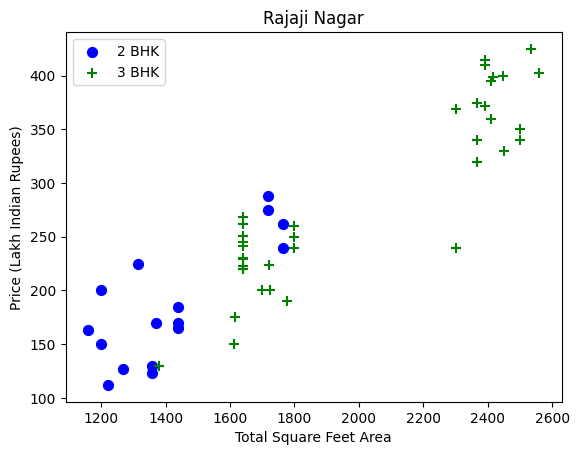

In [52]:
#3. If 2BHK houses are more expensive than 3BHK...
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['size'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['size'] == 3)]
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue',label = '2 BHK', s = 50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker = '+', color = 'green',label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(rdf1,"Rajaji Nagar")

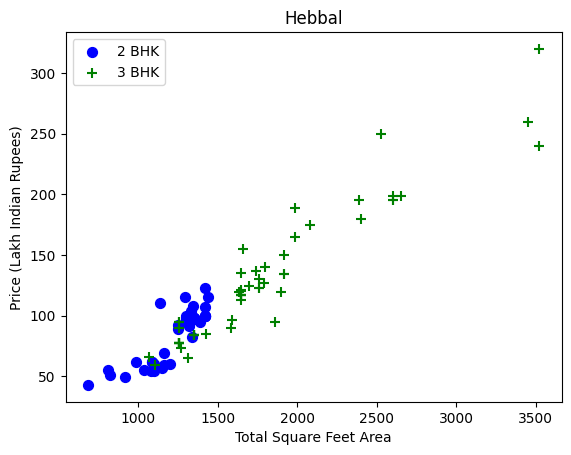

In [53]:
plot_scatter_chart(rdf1,"Hebbal")

In [54]:
#We remove rows for same location where the price of 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area)
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_Sq.ft']),
                'std': np.std(bhk_df['price_per_Sq.ft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_Sq.ft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
rdf2 = remove_bhk_outliers(rdf1)
rdf2.shape

(7030, 10)

Text(0, 0.5, 'Count')

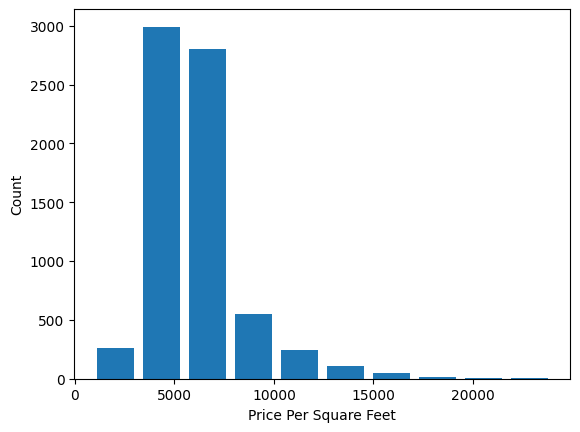

In [55]:
plt.hist(rdf2['price_per_Sq.ft'],rwidth=0.8)
matplotlib.rcParams['figure.figsize'] = (4,6)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [56]:
#4 Can't or unsual to have Number of Bathrooms +2 more than your number of bedrooms(eg. 8 bathroom for 4 BHK house)
rdf2[rdf2['bath'] >= rdf2['size'] + 3]
rdf2 = rdf2[rdf2['bath'] < rdf2['size'] + 3]
rdf2.shape

(7027, 10)

In [57]:
dum = pd.get_dummies(rdf2['location']).drop(columns = 'other').astype(int)
dum.head(1)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
rdf3 = pd.concat([rdf2, dum], axis = 1)
rdf3.drop(columns = ['location', 'price_per_Sq.ft'], inplace = True)

In [59]:
rdf3

,area_type,immediate_availability,size,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,4,2850.0,4,1,428.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,1630.0,3,2,194.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,3,1875.0,2,3,235.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,3,1200.0,2,0,130.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,1235.0,2,2,148.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,1,1,2,1155.0,2,1,64.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9866,4,0,2,1200.0,2,3,70.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9867,1,1,1,1800.0,1,1,200.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9870,1,1,2,1353.0,2,2,110.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X = rdf3.drop(columns = 'price')
y = rdf3['price']

In [61]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2)

# Model Building

In [63]:
#1 Linear Model - Test Train Split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7317964031281218

In [64]:
#Linear Model - Kfold Cross Validation Split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 49)
cross_val_score(LinearRegression(), X, y, cv = cv).mean()

np.float64(0.8185709965307737)

In [85]:
# Using GridSearchCV to find the best model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
global alg
def find_best_model_using_gridsearchcv(X,y):
    alg = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params' : {
                'n_estimators': [1,5,10]
            }
        },
        'ridge_regression' : {
            'model': Ridge(),
            'params': {
                'alpha': [1,2],
                'solver': ['auto', 'svd']
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 49)
    for algo_name, config in alg.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': config['model'],
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores , columns = ['model','best_score','best_params'])

mdf = find_best_model_using_gridsearchcv(X,y).sort_values(by = 'best_score', ascending = False)
mdf

,model,best_score,best_params
2,Ridge(),0.821219,"{'alpha': 1, 'solver': 'auto'}"
0,LinearRegression(),0.818571,{}
1,RandomForestRegressor(),0.793599,{'n_estimators': 10}
4,DecisionTreeRegressor(),0.732675,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Lasso(),0.684931,"{'alpha': 1, 'selection': 'cyclic'}"


In [82]:
best_model = mdf.iloc[0]['model']
best_params = mdf.iloc[0]['best_params']
best_model.set_params(**best_params)
best_model.fit(X, y)

Ridge(alpha=1)

In [68]:
def predict_price(area_type, immediate_availability, location, size, total_sqft, bath, balcony, BHK):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area_type
    x[1] = immediate_availability
    x[2] = size
    x[3] = total_sqft
    x[4] = bath
    x[5] = balcony
    x[6] = BHK
    if loc_index >= 0:
        x[loc_index] = 1

    x_df = pd.DataFrame([x], columns=X.columns)
    # print(x_df)
    return best_model.predict(x_df)[0]


In [69]:
# area_type(1,2,3,4), immediately_available(0,1), Location name, Size BHK, Total Sq.ft, Bath, Balcony, BHK(0,1)
predict_price(1,1,'Indira Nagar',2, 1000.0, 2, 2, 1)

np.float64(158.8111600568658)

In [70]:
predict_price(1,1,'1st Phase JP Nagar',3, 1000.0, 3, 0, 1)

np.float64(103.20615815984156)

In [71]:
predict_price(1,1,'Indira Nagar',3, 1000.0, 3, 2, 1)

np.float64(171.83003726215912)